# MLP to IRIS Dataset


## Loading the IRIS Dataset


In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()

In [3]:
print "Feature names = ", iris.feature_names
print "Target names  = ", iris.target_names

Feature names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names  =  ['setosa' 'versicolor' 'virginica']


In [0]:
X = iris.data
y = iris.target

In [5]:
print "size(X) = ", X.shape
print "size(y) = ", y.shape

size(X) =  (150, 4)
size(y) =  (150,)


###Converting y values to one-hot representation

In [6]:
from keras.utils import np_utils

NB_CLASSES = 3
y_one_hot = np_utils.to_categorical(y, NB_CLASSES)
print "Size(X) = ", X.shape
print "Size(y_one_hot) = ", y_one_hot.shape

Using TensorFlow backend.


Size(X) =  (150, 4)
Size(y_one_hot) =  (150, 3)


###Spliting the Dataset to Train and Test Datasets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.2)
print "Size(X_train) = ", X_train.shape
print "Size(y_train_one_hot) = ", y_train_one_hot.shape
print "Size(X_test) = ", X_test.shape
print "Size(y_test_one_hot) = ", y_test_one_hot.shape

Size(X_train) =  (120, 4)
Size(y_train_one_hot) =  (120, 3)
Size(X_test) =  (30, 4)
Size(y_test_one_hot) =  (30, 3)


###Scaling the training dataset and the test dataset using the MinMaxScaler

In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print X_train[0], "=>", X_train_scaled[0]
print X_test[0], "=>", X_test_scaled[0]

[6.  2.2 4.  1. ] => [0.47222222 0.08333333 0.50847458 0.375     ]
[4.7 3.2 1.6 0.2] => [0.11111111 0.5        0.10169492 0.04166667]


##Building an MLP model

###Creating the model architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
#model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

W0709 13:43:23.985137 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 13:43:24.005913 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 13:43:24.009668 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


###Compiling the model

In [11]:
from keras.optimizers import SGD

OPTIMIZER = SGD(lr=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

W0709 13:43:24.072609 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 13:43:24.082535 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



###Fitting the model

In [12]:
model_history = model.fit(x=X_train_scaled, y=y_train_one_hot, epochs=50, verbose=1)

W0709 13:43:24.192915 140604920362880 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 13:43:24.244833 140604920362880 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
120/120 [==============================] - 0s 1ms/step - loss: 1.0362 - acc: 0.3167
Epoch 2/50
120/120 [==============================] - 0s 85us/step - loss: 0.9914 - acc: 0.5000
Epoch 3/50
120/120 [==============================] - 0s 63us/step - loss: 0.9575 - acc: 0.6583
Epoch 4/50
120/120 [==============================] - 0s 63us/step - loss: 0.9226 - acc: 0.7083
Epoch 5/50
120/120 [==============================] - 0s 89us/step - loss: 0.8903 - acc: 0.6833
Epoch 6/50
120/120 [==============================] - 0s 79us/step - loss: 0.8613 - acc: 0.7083
Epoch 7/50
120/120 [==============================] - 0s 64us/step - loss: 0.8306 - acc: 0.7083
Epoch 8/50
120/120 [==============================] - 0s 82us/step - loss: 0.8048 - acc: 0.7500
Epoch 9/50
120/120 [==============================] - 0s 85us/step - loss: 0.7790 - acc: 0.7250
Epoch 10/50
120/120 [==============================] - 0s 80us/step - loss: 0.7520 - acc: 0.7417
Epoch 11/50
120/120 [===================

In [13]:
score = model.evaluate(X_test_scaled, y_test_one_hot, verbose=1)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

30/30 [==============================] - 0s 831us/step
('Test score:', 0.39424267411231995)
('Test accuracy:', 0.800000011920929)


###Predicting the class

In [0]:
y_pred_classes = model.predict_classes(X_test_scaled)

In [25]:
print y_pred_classes

[0 0 2 2 2 0 2 2 0 2 2 2 0 0 1 0 1 0 1 1 0 0 2 2 2 1 2 2 2 1]


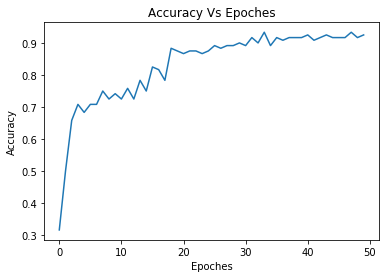

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
  plt.figure()
  plt.xlabel('Epoches')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Vs Epoches')
  plt.plot(network_history.history['acc'])
  plt.show()

plot_history(model_history)